In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import thư viện scipy.stats để thực hiện kiểm định thống kê
import scipy.stats as stats
# Import hàm ztest từ thư viện statsmodels để thực hiện kiểm định z
from statsmodels.stats.weightstats import ztest as ztest
# Import hàm pearsonr để tính tương quan Pearson
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
# Import thư viện statsmodels để thực hiện phân tích phương sai
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
df = pd.read_csv('data-midterm.csv')
df.head(5)

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeToPlay               1000 non-null   float64
 1   TimeToStudy              1000 non-null   float64
 2   ProfessionalScore        1000 non-null   float64
 3   InterviewScore           1000 non-null   object 
 4   Sexuality                1000 non-null   object 
 5   ExpectedSalary           1000 non-null   float64
 6   SocialNetworkingTimeUse  807 non-null    object 
 7   Result                   1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [8]:
# Lọc dữ liệu theo điều kiện
filtered_data = df[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

# Lấy dữ liệu cho TimeToPlay và TimeToStudy
time_to_play = filtered_data['TimeToPlay'].dropna()
time_to_study = filtered_data['TimeToStudy'].dropna()

# Thực hiện kiểm định t độc lập
t_statistic, p_value = stats.ttest_ind(time_to_play, time_to_study)

# In kết quả
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Kiểm tra giả thuyết ở mức sai lầm 5%
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình TimeToPlay và TimeToStudy không bằng nhau.")
else:
    print("Không bác bỏ giả thuyết H0: Trung bình TimeToPlay và TimeToStudy có thể bằng nhau.")

T-statistic: -0.8066329122653516
P-value: 0.42667670534192237
Không bác bỏ giả thuyết H0: Trung bình TimeToPlay và TimeToStudy có thể bằng nhau.


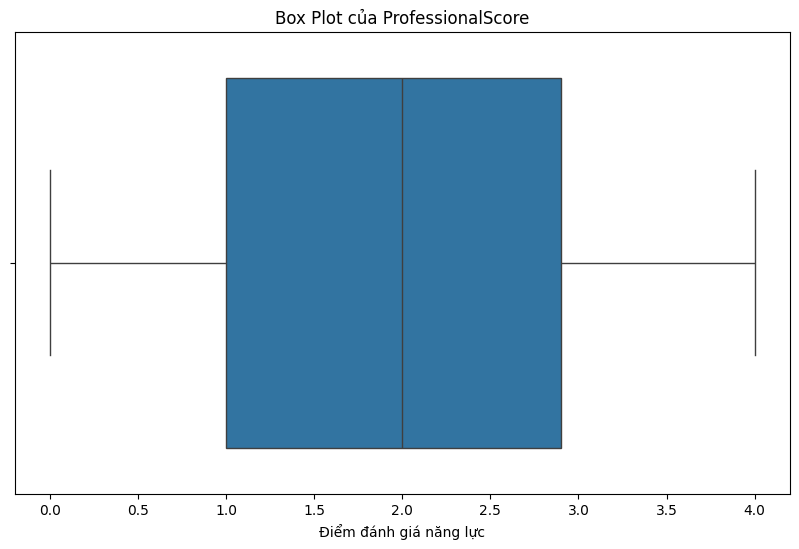

Không có giá trị bất thường trong dữ liệu điểm đánh giá năng lực.


In [9]:
# Tạo box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ProfessionalScore'])
plt.title('Box Plot của ProfessionalScore')
plt.xlabel('Điểm đánh giá năng lực')
plt.show()

# Tính toán IQR
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm giá trị bất thường
outliers = df[(df['ProfessionalScore'] < lower_bound) | (df['ProfessionalScore'] > upper_bound)]

# In kết quả
if not outliers.empty:
    print(f"Có {len(outliers)} giá trị bất thường trong dữ liệu điểm đánh giá năng lực.")
else:
    print("Không có giá trị bất thường trong dữ liệu điểm đánh giá năng lực.")

In [10]:
# Tính toán phân vị thứ 75
Q3 = df['ProfessionalScore'].quantile(0.75)

print(f'25% số lượng sinh viên có điểm đánh giá năng lực cao hơn: {Q3}')


25% số lượng sinh viên có điểm đánh giá năng lực cao hơn: 2.9


In [44]:
# Tính toán giá trị phân vị thứ nhất (Q1)
Q1 = df['ProfessionalScore'].quantile(0.25)

print(f"25% số lượng sinh viên có điểm đánh giá năng lực cao hơn: {Q1}")

25% số lượng sinh viên có điểm đánh giá năng lực cao hơn: 1.0


In [11]:
# Tạo bảng crosstab
crosstab_result = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# Tìm giá trị nhỏ nhất
min_value = crosstab_result.min().min()  # Tìm giá trị nhỏ nhất trong bảng

# Xác định nhóm tương ứng với giá trị nhỏ nhất
min_group = crosstab_result.stack().idxmin()  # Tìm nhóm tương ứng

print(f'Giá trị nhỏ nhất là: {min_value} thuộc nhóm: {min_group}')

Giá trị nhỏ nhất là: 5 thuộc nhóm: ('B', 'A')


In [14]:
# Tạo bảng crosstab
crosstab_result = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# Thực hiện kiểm định chi-squared
chi2, p, dof, expected = chi2_contingency(crosstab_result)

# In kết quả
print(f'Giá trị chi-squared: {chi2}')
print(f'P-value: {p}')
print(f'Số bậc tự do: {dof}')
print(f'Giá trị kỳ vọng:\n{expected}')
# Kiểm tra giả thuyết
alpha = 0.05
if p < alpha:
    print("Có bằng chứng để bác bỏ giả thuyết H0: Kết quả phỏng vấn phụ thuộc vào xu hướng tính dục.")
else:
    print("Không có bằng chứng để bác bỏ giả thuyết H0: Kết quả phỏng vấn không phụ thuộc vào xu hướng tính dục.")



Giá trị chi-squared: 8.569523652470144
P-value: 0.9300780652577139
Số bậc tự do: 16
Giá trị kỳ vọng:
[[  5.852  21.28   38.703  39.368  27.797]
 [  6.468  23.52   42.777  43.512  30.723]
 [  8.888  32.32   58.782  59.792  42.218]
 [ 18.172  66.08  120.183 122.248  86.317]
 [  4.62   16.8    30.555  31.08   21.945]]
Không có bằng chứng để bác bỏ giả thuyết H0: Kết quả phỏng vấn không phụ thuộc vào xu hướng tính dục.


In [15]:
# Tính khoảng giá trị của TimeToStudy
time_to_study_min = df['TimeToStudy'].min()
time_to_study_max = df['TimeToStudy'].max()
range_value = time_to_study_max - time_to_study_min

# Số bin
num_bins = 20

# Tính độ lớn của mỗi bin
bin_size = range_value / num_bins

print(f'Độ lớn của mỗi bin là: {bin_size}')

Độ lớn của mỗi bin là: 0.5


Tỷ lệ phần trăm các nhóm giới tính:
Sexuality
Q    41.3
L    20.2
G    14.7
B    13.3
T    10.5
Name: proportion, dtype: float64


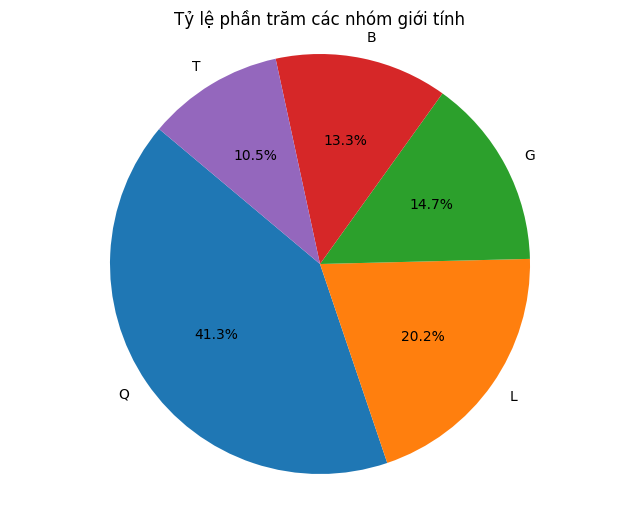

In [18]:
# Tính tỷ lệ phần trăm các nhóm giới tính
gender_counts = df['Sexuality'].value_counts(normalize=True) * 100

# In tỷ lệ phần trăm
print("Tỷ lệ phần trăm các nhóm giới tính:")
print(gender_counts)

# Vẽ biểu đồ pie
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ phần trăm các nhóm giới tính')
plt.axis('equal')  # Để biểu đồ có hình tròn
plt.show()


In [20]:
# Tính trung bình điểm đánh giá năng lực
overall_mean = df['ProfessionalScore'].mean()

# Nhóm theo xu hướng tính dục và tính trung bình điểm đánh giá năng lực
mean_by_sexuality = df.groupby('Sexuality')['ProfessionalScore'].mean()

# Lọc ra những nhóm có điểm đánh giá năng lực lớn hơn trung bình
above_average_groups = mean_by_sexuality[mean_by_sexuality > overall_mean]

# Chuyển đổi kết quả thành danh sách
result_groups = above_average_groups.index.tolist()

# In kết quả
print("Những nhóm xu hướng tính dục có điểm đánh giá năng lực lớn hơn trung bình:")
print(result_groups)

# Kiểm tra với các đáp án
options = {
    'a': ['B', 'Q'],
    'b': ['G', 'L', 'T', 'Q'],
    'c': ['T', 'L'],
    'd': ['G', 'L', 'T'],
    'e': ['Q', 'T'],
    'f': ['G', 'L'],
    'g': ['T', 'G', 'L', 'Q'],
    'h': ['T', 'Q', 'B']
}

# Kiểm tra các đáp án
for key, value in options.items():
    if sorted(result_groups) == sorted(value):
        print(f"Kết quả phù hợp với đáp án: {key}. {value}")

Những nhóm xu hướng tính dục có điểm đánh giá năng lực lớn hơn trung bình:
['B', 'Q']
Kết quả phù hợp với đáp án: a. ['B', 'Q']


In [23]:

# Định nghĩa các khoảng và nhãn
bins = [0, 5, 7, 9, float('Inf')]
labels = ['Bad', 'Pretty', 'Good', 'Excellent']

# Tạo cột mới cho nhãn
df['TimeToStudyLabel'] = pd.cut(df['TimeToStudy'], bins=bins, labels=labels, right=False)

# Đếm số phần tử thuộc nhóm nhãn 'Good'
count_good = df[df['TimeToStudyLabel'] == 'Good'].shape[0]

print(f"Số phần tử thuộc nhóm nhãn 'Good': {count_good}")


Số phần tử thuộc nhóm nhãn 'Good': 201


In [27]:
df.shape



(1000, 9)

In [30]:
# Tính Q1, Q3 và IQR
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

# Tính khoảng nghi ngờ bất thường
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# In kết quả
print(f"Khoảng dữ liệu nghi ngờ bất thường:")
print(f"Giá trị dưới: {lower_bound}")
print(f"Giá trị trên: {upper_bound}")

Khoảng dữ liệu nghi ngờ bất thường:
Giá trị dưới: -1.8499999999999996
Giá trị trên: 5.75


In [37]:
# Định nghĩa các khoảng và nhãn
bins = [0, 0.2, 0.5, 0.6, 0.8, 1]
labels = ['A', 'B', 'C', 'D', 'E']

# Giá trị cần kiểm tra
score_value = 2.7

# Gán nhãn cho giá trị cụ thể
score_label = pd.cut([score_value], bins=bins, labels=labels, right=False)

# Kiểm tra kết quả
if score_value < bins[0] or score_value >= bins[-1]:
    score_label = "Không thuộc khoảng chia"
else:
    score_label = score_label[0]

# In kết quả
print(f"Giá trị ProfessionalScore = {score_value} thuộc khoảng: {score_label}")

Giá trị ProfessionalScore = 2.7 thuộc khoảng: Không thuộc khoảng chia


In [38]:
# Giả sử bạn có cột ProfessionalScore
mean_score = 2.4575
alpha = 0.05  # Mức ý nghĩa 5%

# Tính trung bình và độ lệch chuẩn
sample_mean = df['ProfessionalScore'].mean()
sample_std = df['ProfessionalScore'].std()
n = df['ProfessionalScore'].count()

# Tính t-statistic
t_statistic = (sample_mean - mean_score) / (sample_std / np.sqrt(n))

# Tính giá trị p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n-1))

# So sánh p-value với alpha
if p_value < alpha:
    result = "Không đủ dữ kiện để kết luận trung bình điểm đánh giá năng lực bằng 2.4575"
else:
    result = "Đủ dữ kiện để kết luận trung bình điểm đánh giá năng lực bằng 2.4575"

# In kết quả
print(f"p-value: {p_value}")
print(result)


p-value: 0.0
Không đủ dữ kiện để kết luận trung bình điểm đánh giá năng lực bằng 2.4575


In [42]:

# Tính giá trị mode (đa số) của điểm phỏng vấn
most_common_interview_score = df['InterviewScore'].mode()[0]

print(f"Đa số điểm phỏng vấn của sinh viên là: {most_common_interview_score}")

Đa số điểm phỏng vấn của sinh viên là: D


In [43]:
# Lọc dữ liệu không có giá trị NaN
df_clean = df[['TimeToStudy', 'TimeToPlay', 'ProfessionalScore']].dropna()

# Tạo biến độc lập và phụ thuộc
X = df_clean[['TimeToStudy', 'TimeToPlay']]  # Biến độc lập
y = df_clean['ProfessionalScore']  # Biến phụ thuộc

# Thêm hằng số vào mô hình
X = sm.add_constant(X)

# Tạo mô hình hồi quy
model = sm.OLS(y, X).fit()

# In kết quả hồi quy
print(model.summary())

# So sánh mức độ tác động
coef_time_to_study = model.params['TimeToStudy']
coef_time_to_play = model.params['TimeToPlay']

print(f"Hệ số hồi quy của TimeToStudy: {coef_time_to_study}")
print(f"Hệ số hồi quy của TimeToPlay: {coef_time_to_play}")

if coef_time_to_study > coef_time_to_play:
    print("Thời gian dành cho việc học có tác động mạnh hơn đến điểm đánh giá năng lực.")
elif coef_time_to_study < coef_time_to_play:
    print("Thời gian dành cho việc giải trí có tác động mạnh hơn đến điểm đánh giá năng lực.")
else:
    print("Cả hai yếu tố có tác động tương đương đến điểm đánh giá năng lực.")


                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        19:12:44   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [48]:
df.head(60)

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result,TimeToStudyLabel,ScoreLabel
0,0.1,4.4,2.5,F,T,249.6,Much,NO,Bad,NaN
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES,Pretty,NaN
2,7.3,0.9,2.7,D,T,862.0,Almost,NO,Bad,NaN
3,6.2,8.8,2.7,D,T,147.2,Almost,YES,Good,NaN
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO,Bad,B
5,3.9,2.4,3.6,D,T,574.0,NaN,NO,Bad,NaN
6,8.1,2.4,1.5,B,Q,888.3,Almost,NO,Bad,NaN
7,2.0,1.1,1.7,C,Q,976.1,Almost,NO,Bad,NaN
8,8.3,5.3,3.3,D,B,755.9,Almost,YES,Pretty,NaN
9,4.3,6.4,2.3,C,Q,216.1,Much,NO,Pretty,NaN
